In [1]:
import MeCab
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
import japanize_matplotlib
import re

In [2]:
karada_genki = pd.read_excel('article_data.xlsx', sheet_name='karada_genki')    
otona_beauty = pd.read_excel('article_data.xlsx', sheet_name='otona_beauty')   
kounenki_no_chie = pd.read_excel('article_data.xlsx', sheet_name='kounenki_no_chie')   
life = pd.read_excel('article_data.xlsx', sheet_name='life')   
odekake_joshigumi = pd.read_excel('article_data.xlsx', sheet_name='odekake_joshigumi')
food = pd.read_excel('article_data.xlsx', sheet_name='food')
future_planning = pd.read_excel('article_data.xlsx', sheet_name='future_planning')


In [3]:
def clean_text(df):
    text=''
    for article in df:
        text += article
        
    tagger = MeCab.Tagger('')
    tagger.parse('') 
    node = tagger.parseToNode(text)
    word_list = []
    while node:
        feature = node.feature.split(",")
        if feature[0] == "名詞":  
            word = node.surface
            word_list.append(word)
        node = node.next
    return word_list


In [4]:
def topic_analysis(df, title, category):
    word_list = clean_text(df)
    df = pd.DataFrame(word_list)
    df_counts = df.value_counts(ascending=False).rename_axis('keywords').reset_index(name='counts').iloc[:10]
    df_counts.to_excel(writer, sheet_name=category)
    sns.set(font='IPAexGothic')
    sns.set_context("notebook", font_scale=1.1)
    plt.figure(figsize=(8,4))
    countplot = sns.barplot(y='keywords', x='counts', data=df_counts, alpha=0.8)
    countplot.set_title(title)
    plt.savefig(title+'.png', dpi=300);

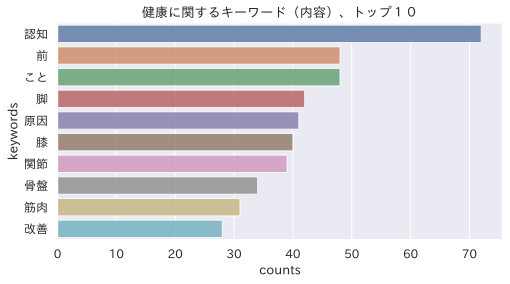

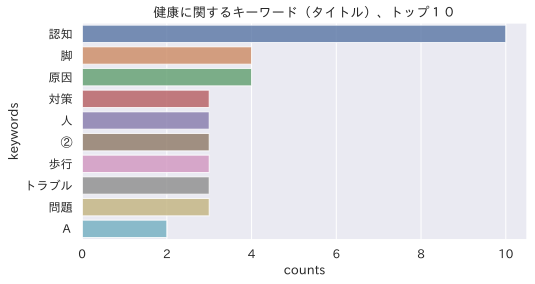

In [5]:
writer = pd.ExcelWriter('keywords.xlsx', engine='xlsxwriter')

topic_analysis(karada_genki['content'], '健康に関するキーワード（内容）、トップ１０', 'health')
topic_analysis(karada_genki['title'], '健康に関するキーワード（タイトル）、トップ１０', 'health')

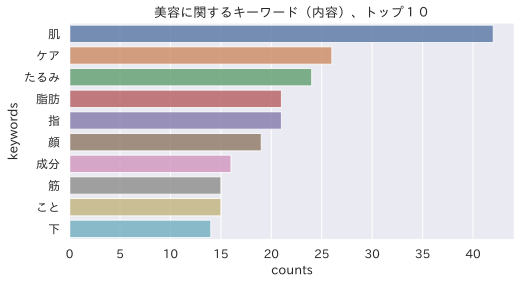

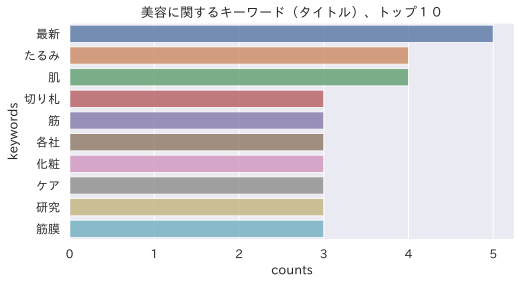

In [6]:
topic_analysis(otona_beauty['content'], '美容に関するキーワード（内容）、トップ１０', 'beauty')
topic_analysis(otona_beauty['title'], '美容に関するキーワード（タイトル）、トップ１０', 'beauty')

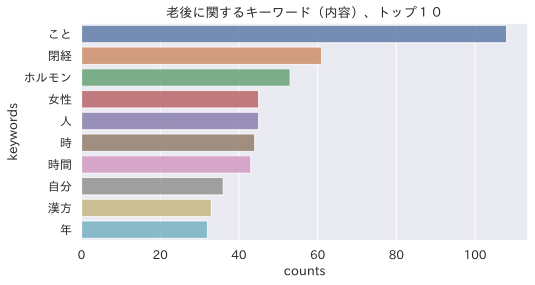

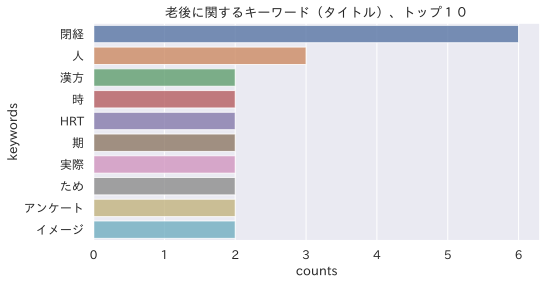

In [7]:
topic_analysis(kounenki_no_chie['content'], '老後に関するキーワード（内容）、トップ１０', 'aging_care')
topic_analysis(kounenki_no_chie['title'], '老後に関するキーワード（タイトル）、トップ１０', 'aging_care')

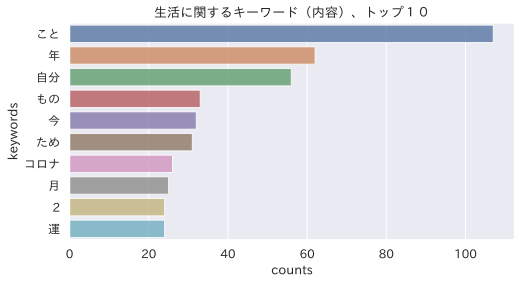

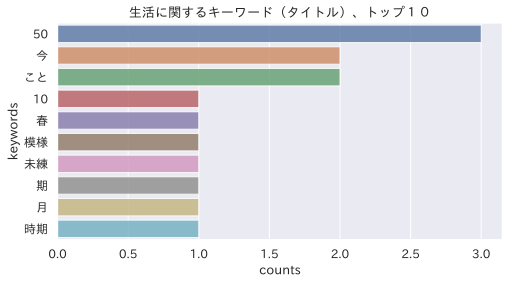

In [8]:
topic_analysis(life['content'], '生活に関するキーワード（内容）、トップ１０', 'life')
topic_analysis(life['title'], '生活に関するキーワード（タイトル）、トップ１０', 'life')

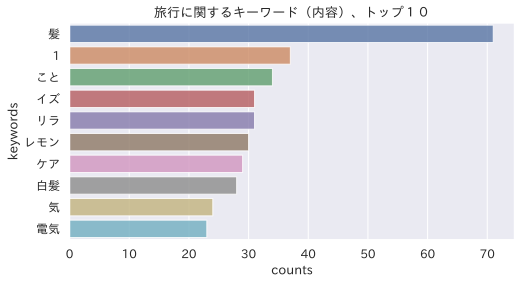

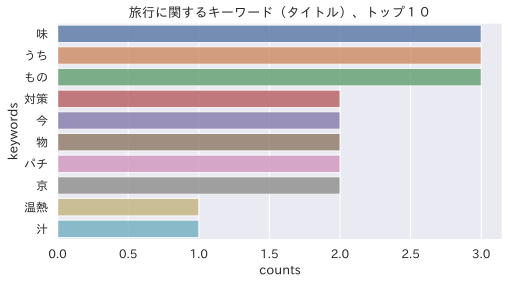

In [9]:
topic_analysis(odekake_joshigumi['content'], '旅行に関するキーワード（内容）、トップ１０', 'travel')
topic_analysis(odekake_joshigumi['title'], '旅行に関するキーワード（タイトル）、トップ１０', 'travel')

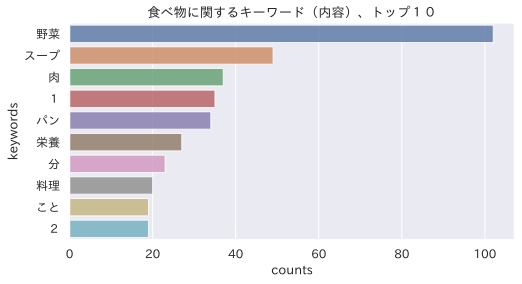

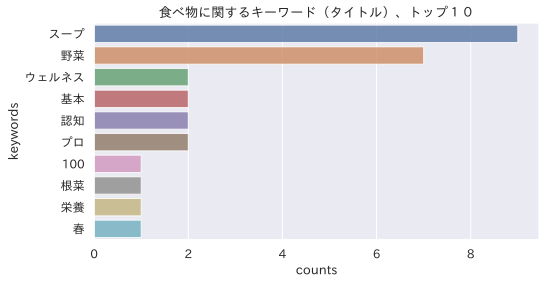

In [10]:
topic_analysis(food['content'], '食べ物に関するキーワード（内容）、トップ１０', 'food')
topic_analysis(food['title'], '食べ物に関するキーワード（タイトル）、トップ１０', 'food')

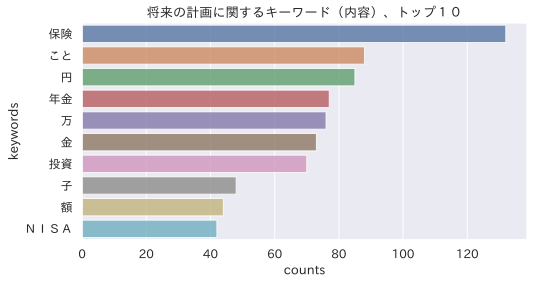

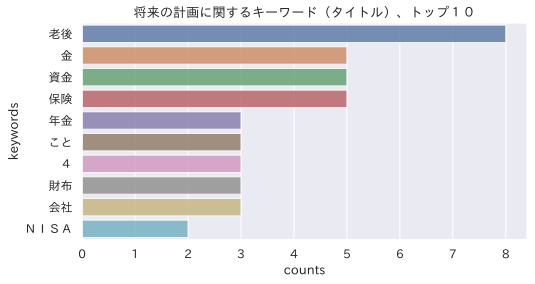

In [11]:
topic_analysis(future_planning['content'], '将来の計画に関するキーワード（内容）、トップ１０', 'future_planning')
topic_analysis(future_planning['title'], '将来の計画に関するキーワード（タイトル）、トップ１０', 'future_planning')

In [12]:
writer.save()